# Ensemble Methods Using SKLearn

Implemented by Pratham Shah (240905614), Member of the MANAS AI Taskphase-6 '24-'25

### Imports

In [126]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, recall_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold

### Reading the CSV file

In [127]:
original = pd.read_csv("Threats (1).csv")
data = original.copy()
unique_ids = {}

### Encoding Textual Data

SKLearn doesn't accept textual data, so I've encoded it into unique numerical values.

In [128]:
def unique_item_code (item):
    if item != "":
        sum_of_ords = sum([ord(val) for val in item])
        length = len(item)
        ord_first = ord(item[0])
        ord_last = ord(item[-1])
        unique_id = sum_of_ords+length+ord_first*2+ord_last
    else: unique_id = 1

    if unique_id not in unique_ids.keys():
        unique_ids[unique_id] = item

    return unique_id

def frequency_encoding(columns):
    global data
    for col in columns:
        data[col + '_freq'] = [unique_item_code(item) for item in data[col].values]
        data.drop(col, axis=1, inplace=True)
frequency_encoding(["proto", "service", "state", "attack_cat"])
titles = list(data)[1:-1]

titles = list(data)[1:-1]
accuracy_list = []
X= data[titles].values
y= data['attack_cat_freq'].values
data.head()

,Unnamed: 0,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_freq,service_freq,state_freq,attack_cat_freq
0,40000,40001,0.012996,16,18,1540,1644,2539.242797,31,29,8.888889e+05,9.559864e+05,4,4,0.846067,0.737706,58.402734,1.340626,255,1292568769,3444059673,255,0.000563,0.000452,0.000111,96,91,0,0,6,0,6,2,1,6,0,0,0,5,7,0,0,674,181,442,887
1,40001,40002,0.004119,12,12,1064,2260,5583.879675,31,29,1.895606e+06,4.024278e+06,4,4,0.341455,0.320636,17.194049,0.386183,255,1045213639,1045527320,255,0.000721,0.000583,0.000138,89,188,0,0,8,0,2,1,1,1,0,0,0,3,8,0,0,674,181,442,887
2,40002,40003,0.000988,2,2,146,178,3036.437382,31,29,5.910931e+05,7.206478e+05,0,0,0.009000,0.004000,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,73,89,0,0,3,0,3,2,1,2,0,0,0,7,2,0,0,678,643,439,887
3,40003,40004,3.415787,230,238,24344,29556,136.718127,31,29,5.676935e+04,6.893170e+04,54,67,14.916100,14.407422,1141.623737,1123.539984,255,1340049482,1340354252,255,0.001251,0.001104,0.000147,106,124,0,0,1,0,4,1,1,1,0,0,0,4,1,0,0,674,671,442,887
4,40004,40005,0.193943,72,74,4238,63618,747.642372,31,29,1.724218e+05,2.588761e+06,7,30,2.765914,2.649630,182.627025,175.704486,255,932567253,3116620258,255,0.000655,0.000517,0.000138,59,860,0,0,3,0,6,1,1,5,0,0,0,6,12,0,0,674,181,442,887


### K-Fold cross evaluation

Allows a better understanding of how the model reacts to new data.

In [129]:
classes =  list(map(lambda x: unique_ids[x],data['attack_cat_freq']))

def crossval(X, y, clf):
    kf = KFold(n_splits=10, shuffle=False)
    accuracy_list = []
    n= 0
    print("Cross validation for each fold:")
    for train_index, test_index in kf.split(X, y):
        clf.fit(X[train_index], y[train_index])
        score = clf.score(X[test_index], y[test_index])
        accuracy_list.append(score)
        print("\nModel iteration {0}:".format(n+1))
        train_predictions = clf.predict(X[train_index])
        train_accuracy = accuracy_score(y[train_index], train_predictions)
        test_predictions = clf.predict(X[test_index])
        total_predictions = clf.predict(X)
        total_accuracy = accuracy_score(y, total_predictions)
        print("Accuracies on:\nTraining Data: {0}\nTesting Data (Score): {1}\nTotal Data: {2}".format(train_accuracy, score, total_accuracy))
        n += 1

### Decision Tree Classifier

With Matthews Score, Score and Graph.

Matthews Correlation Score:  0.7745208752489461


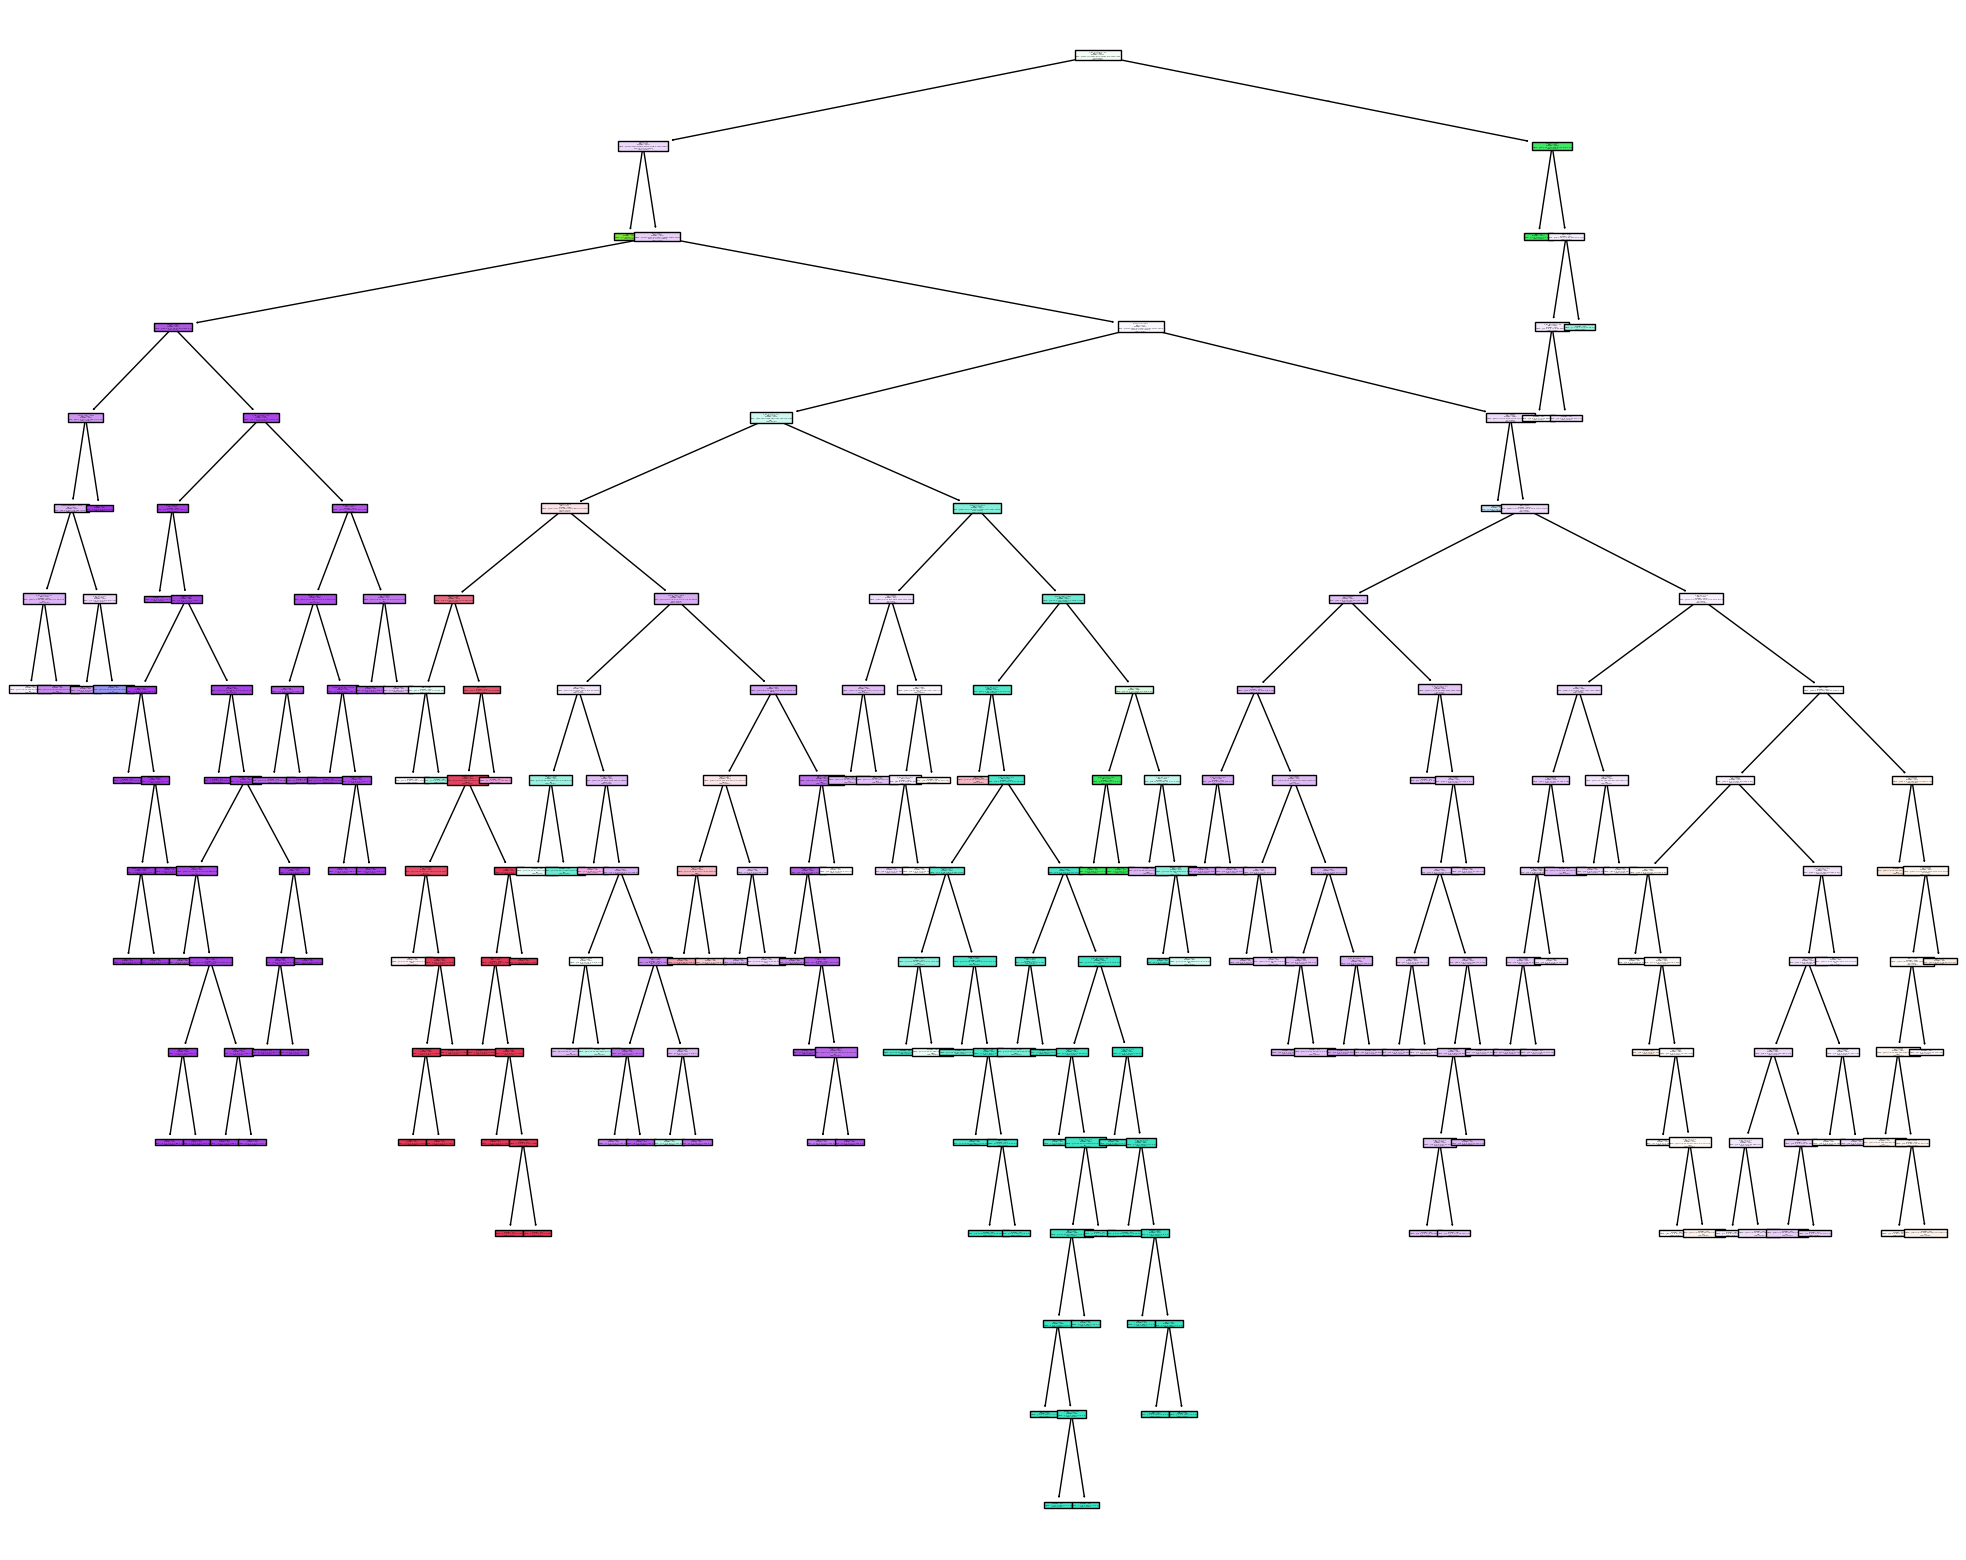

In [130]:
clf = DecisionTreeClassifier(min_samples_leaf=int(len(data)/300))

#crossval(data[titles].values, data['attack_cat_freq'].values, clf)
clf.fit(X, y)
clfscore = clf.score(X, y)

print("Matthews Correlation Score: ", matthews_corrcoef(clf.predict(X), y))

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, feature_names=titles, class_names=classes, filled=True)

### Bagging Classifier

Along with score and K-Fold cross-validation.

In [131]:
bag = BaggingClassifier(clf, 3)
bag.fit(X, y)
bagscore = bag.score(X, y)

crossval(data[titles].values, data['attack_cat_freq'].values, bag)

Cross validation for each fold:

Model iteration 1:
Accuracies on:
Training Data: 0.8008800880088008
Testing Data (Score): 0.8942741041743628
Total Data: 0.810220110683385

Model iteration 2:
Accuracies on:
Training Data: 0.8189184529624735
Testing Data (Score): 0.7178217821782178
Total Data: 0.8088088605817897

Model iteration 3:
Accuracies on:
Training Data: 0.8214552529821767
Testing Data (Score): 0.7226245012560958
Total Data: 0.8115722508330809

Model iteration 4:
Accuracies on:
Training Data: 0.8211761228829213
Testing Data (Score): 0.6960248263632334
Total Data: 0.8086610857020415

Model iteration 5:
Accuracies on:
Training Data: 0.8144770005007922
Testing Data (Score): 0.7328210432983597
Total Data: 0.8063114651140453

Model iteration 6:
Accuracies on:
Training Data: 0.8153308102161616
Testing Data (Score): 0.7492980641347717
Total Data: 0.8087275843979282

Model iteration 7:
Accuracies on:
Training Data: 0.8012101110773601
Testing Data (Score): 0.8532584601743757
Total Data: 0

### Random Forest Classifier

Along with K-Fold cross-validation and score.

In [132]:
rdfo = RandomForestClassifier(3)
rdfo.fit(X,y)
rdfoscore = rdfo.score(X, y)

crossval(data[titles].values, data['attack_cat_freq'].values, rdfo)

Cross validation for each fold:

Model iteration 1:
Accuracies on:
Training Data: 0.9542469172290363
Testing Data (Score): 0.8099002585888437
Total Data: 0.9398112914785616

Model iteration 2:
Accuracies on:
Training Data: 0.9589186171566495
Testing Data (Score): 0.7022314171715679
Total Data: 0.9332500868177418

Model iteration 3:
Accuracies on:
Training Data: 0.9583849860845436
Testing Data (Score): 0.6942515147037092
Total Data: 0.93197183410792

Model iteration 4:
Accuracies on:
Training Data: 0.9586559064749973
Testing Data (Score): 0.6620363528890203
Total Data: 0.928994170280994

Model iteration 5:
Accuracies on:
Training Data: 0.9582290016173126
Testing Data (Score): 0.719595093837742
Total Data: 0.9343657871598406

Model iteration 6:
Accuracies on:
Training Data: 0.9587133744366088
Testing Data (Score): 0.7504802719077878
Total Data: 0.937890218041835

Model iteration 7:
Accuracies on:
Training Data: 0.9556675724712045
Testing Data (Score): 0.8481601891532436
Total Data: 0.944

### Boosting

Along with score.

In [133]:
boo = AdaBoostClassifier(clf)
boo.fit(X, y)
booscore = boo.score(X, y)
print("Boosted score : ", booscore)

/home/pratham/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Boosted score :  0.7697667373523175


### Comparing the scores

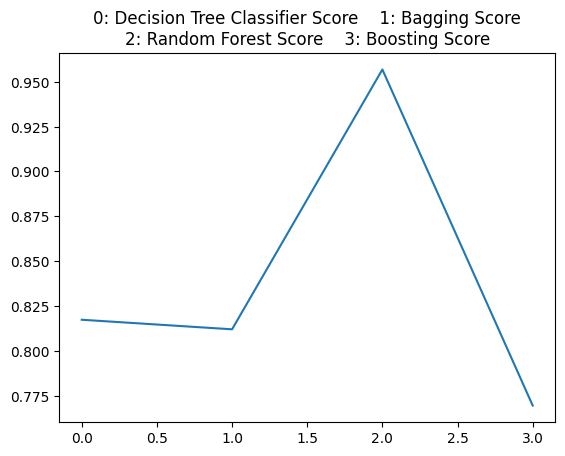

In [134]:
scores = [clfscore, bagscore, rdfoscore, booscore]
plt.plot([index for index, item in enumerate(scores)], scores)
plt.title("0: Decision Tree Classifier Score    1: Bagging Score\n2: Random Forest Score    3: Boosting Score")
plt.show()